In [2]:
import quandl
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:
quandl.ApiConfig.api_key = "insert-API-key-here"

In [4]:
data = quandl.get("USTREASURY/YIELD", limit=100)

In [5]:
data

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2019-01-15,2.41,2.43,2.45,2.52,2.57,2.53,2.51,2.53,2.61,2.72,2.92,3.08
2019-01-16,2.41,2.40,2.43,2.49,2.57,2.55,2.53,2.54,2.62,2.73,2.92,3.07
2019-01-17,2.41,2.41,2.42,2.50,2.57,2.56,2.55,2.58,2.66,2.75,2.93,3.07
2019-01-18,2.40,2.40,2.41,2.50,2.60,2.62,2.60,2.62,2.70,2.79,2.95,3.09
2019-01-22,2.38,2.40,2.43,2.51,2.59,2.58,2.55,2.57,2.65,2.74,2.91,3.06
2019-01-23,2.37,2.38,2.41,2.51,2.59,2.58,2.57,2.59,2.66,2.76,2.93,3.07
2019-01-24,2.38,2.41,2.37,2.50,2.58,2.56,2.54,2.55,2.62,2.72,2.89,3.04
2019-01-25,2.36,2.41,2.39,2.51,2.60,2.60,2.58,2.59,2.66,2.76,2.92,3.06
2019-01-28,2.39,2.41,2.42,2.51,2.60,2.60,2.58,2.58,2.65,2.75,2.92,3.06


## Assumptions for calculating volatility


#### The specific transformations on interest rates to prepare it for calculating volatility
Volatility of interest rates is the standard deviation of the daily interest rates. For some reason, the logarithm is taken and this somehow helps with modelling continuous compounding.

$$ \text{pct_change}_t = \frac{interest_t}{interest_{t-1}} $$

$$ \text{rate} = ln(\text{pct_change}_t) $$

"rate" is the variable whose standard deviations represent the commonly used definitions of volatility.

#### How to get the period's volatility for use in the interest rate tree

We use a certain number of days for each year to calculate the interest rate volatility $\sigma$, which is the standard deviation of the "rate" calculated above.


In [6]:
## Important Variables
Number_of_days = {
    "1m": 255/12,
    "2m": 255/6,
    "3m": 255/4,
    "6m": 255/2,
    "1y": 255,
    "2y": 255*2,
    "3y": 255*3,
    "5y": 255*5,
    "7y": 255*7,
    "10y": 255*10,
    "20y": 255*20,
    "30y": 255*30
}

data.columns = ["1m", "2m", "3m", "6m", "1y", "2y", "3y", "5y", "7y", "10y", "20y", "30y"]
datapoints = len(data)

## Make a logarithmic return table to work out stdev assuming continuous returns
Rates_per_maturity = {}
Std_per_maturity = {}

for maturity in data.columns:
    Rates_per_maturity[maturity] = data[maturity][:-1].values /data[maturity][1:]
    Rates_per_maturity[maturity] = np.log(Rates_per_maturity[maturity])
    Std_per_maturity[maturity] = np.std(Rates_per_maturity[maturity])
    
print(Std_per_maturity)

{'1m': 0.006686242988880103, '2m': 0.00598117591993426, '3m': 0.0064850860726350466, '6m': 0.006873944527367986, '1y': 0.00940232416965979, '2y': 0.017526468912757474, '3y': 0.017161953078006345, '5y': 0.017105626260194635, '7y': 0.016397475154340386, '10y': 0.014379113120326952, '20y': 0.012527334460713814, '30y': 0.010966321634233604}


## Hacking together a binomial interest rate tree

#### How to code a tree

To calibrate a tree, an estimate of volatility is required. Prices need to be computed based on the given yields to calibrate the tree.

1 - First we get the distances between the maturities. This is the maturity of the forward rates we want to estimate.

2 - Next, we use those distances to get a scaled estimate of volatility, according to the following formula

$$ \sigma_{period} = \underbrace{ \sigma_{daily} }_{\text{ already estimated }} \cdot \sqrt{|period|} $$

3 - Finally, we calculate the actual prices of zero-coupon bonds with all the maturities

Having completed these steps, we are fully equipped to start construction of the binomial tree



In [7]:
today_rates = data.tail(1)

# construct lengths of periods between maturities. (forward periods)
select_maturities = data.columns
forward_lengths = ["1m"]

# loop through dates, coming up with differences between dates.
for index in range(len(select_maturities) - 1):
    maturity = select_maturities[index]
    next_maturity = select_maturities[index + 1]
    if re.search("y", next_maturity) and re.search("m", maturity):
        difference = int(next_maturity[:-1]) * 12 - int(maturity[:-1])
        difference = str(difference) + "m" if difference % 12 != 0 else str(difference/12) + "y"
    else:
        difference = int(next_maturity[:-1]) - int(maturity[:-1])
        difference = str(difference) + next_maturity[-1]
    forward_lengths.append(difference)

print(forward_lengths)

['1m', '1m', '1m', '3m', '6m', '1y', '1y', '2y', '2y', '3y', '10y', '10y']


In [8]:
def get_volatilities_for_period_lengths(stdevs_per_maturity, forward_lengths, maturities, number_of_days):
    volatilities = {}
    volatilities[maturities[0]] = 0
    for i in range(1, len(forward_lengths)):
        period_length = number_of_days[forward_lengths[i]]
        vol_i = stdevs_per_maturity[maturities[i]] * np.sqrt(period_length)
        volatilities[maturities[i]] = vol_i
    return volatilities

model_volatilities = get_volatilities_for_period_lengths(Std_per_maturity, forward_lengths, select_maturities, Number_of_days)
print(model_volatilities)
    

{'1m': 0, '2m': 0.027571858650361797, '3m': 0.02989476967801487, '6m': 0.054884045742273166, '1y': 0.1061671876023826, '2y': 0.2798752645379952, '3y': 0.2740544134477336, '5y': 0.38629942968410497, '7y': 0.3703071260899218, '10y': 0.39770661800789336, '20y': 0.632599381252463, '30y': 0.5537720975030459}


# Converting Yields into Prices (IMPORTANT)

The *Yield To Maturity* is the single discount rate, which when applied to all future cash flows results in the bond's current price. 

$$ P_0 = \sum_{i=0}^{n}\frac{C_i}{(1+YTM)^i} + \frac{Par}{(1+r)^n} $$

is the formula for YTM if there are annual coupons.

However, if there are bonds with semi-annual coupons, the YTM is divided by 2, and compounding is done in increments of 0.5. This is the so-called "Bond Equivalent Yield".

$$ P_0 = \sum_{t=0}^{2n}\frac{C_i/2}{(1 + \frac{YTM}{2})^{t/2}} + \frac{Par}{(1+r)^{2n}} $$

Note that only bonds with maturities of 2 years and greater actually pay coupon interest, so simple discounting will suffice for T-bills.

Edit: Note also that given that on the run securities frequently trade at par, the coupon rate $C_i$ should exactly equal $YTM$. This means that the formula simply yields the price 100. Given this information, it is better for the purposes of the interest rate tree to simply use the zero-coupon rate, $YTM$, in simple discounting, rather than use the price of 100, if both bills and bonds are to be used in the same interest rate tree.

In [9]:
def get_prices(today_rates, select_maturities):
    prices = {}
    for maturity in select_maturities:
        rate = today_rates[maturity]
        rate = rate.values[0] ## turning a pd series into a single float
        len_maturity = int(maturity[:-1]) if "y" in maturity else int(maturity[:-1])/12 # casting maturity as a float in years
        
        if len_maturity < 2:
            price = 100/((1 + (rate/100))**(len_maturity))
        else:
            ## BEY basis
            # price = 100
            price = 100/((1 + (rate/100))**(len_maturity))
        prices[maturity] = price
    return prices

model_prices = get_prices(today_rates, select_maturities)
print(model_prices)

{'1m': 99.81068370504758, '2m': 99.61848012212569, '3m': 99.437986129385, '6m': 98.94202953258747, '1y': 98.06805923310777, '2y': 96.40019964481347, '3y': 94.73287591784431, '5y': 91.24200777182028, '7y': 87.23546188786017, '10y': 81.31449362699836, '20y': 62.7183256414525, '30y': 46.70779167520733}


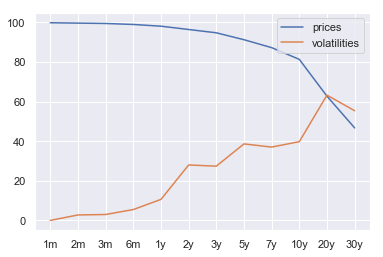

In [11]:
sns.set()
list_prices = [model_prices[i] for i in select_maturities]
list_vols = [model_volatilities[i]*100 for i in select_maturities]

plt.plot(select_maturities, list_prices, label="prices");
plt.plot(select_maturities, list_vols, label="volatilities");
plt.legend(loc="upper right");

[2.3  2.32 2.28 2.15 1.97 1.85 1.82 1.85 1.97 2.09 2.36 2.57] [0.08333333333333333, 0.16666666666666666, 0.25, 0.5, 1, 2, 3, 5, 7, 10, 20, 30]


(0, 30)

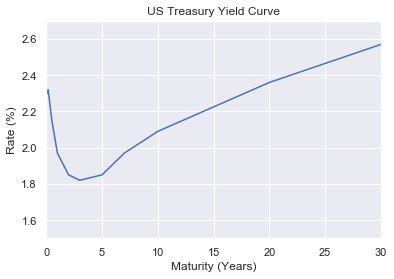

In [14]:
times = [int(i[:-1]) if i[-1] == "y" else float(int(i[:-1])/12) for i in data.columns]
print(today_rates.values[0], times)
sns.set()
sns.lineplot(times, today_rates.values[0])
plt.title("US Treasury Yield Curve")
plt.xlabel("Maturity (Years)")
plt.ylabel("Rate (%)")
## plt.savefig("Rates.png", dpi=1000)
plt.ylim(1.5, 2.7)
plt.xlim(0,30)

# Model Components

Having gotten all the required inputs, including calibrating treasury prices and their corresponding volatilities, we may proceed to construct a binomial interest rate tree. This will be done by means of a for loop, going through each of the maturity dates, and backpropogating to calibrate the forward rates.

Backpropogation is the heart of the procedure, the algorithm is as follows:

```Python3

def backprop(maturity_number, target_price):
    lowest = 0
    highest = 100
    mid = lowest + highest / 2
    price_at_mid = calc(mid, maturity_id):
    while abs(price_at_mid - target_price) < 0.0001:
        if price_at_mid > target_price:
            lowest = mid
            mid = .5 * (lowest + highest)
        else:
            highest = mid
            mid = .5 * (lowest + highest)
        price_at_mid = calc(mid, maturity_id)
    return mid
```

$ \text{calc(rate, maturity_id)} $ is supposed to be a way to work out the price given the interest rate generated from the iterative backprop algorithm. This should use some tree data structure for convenience

In [15]:
class Tree():
    def __init__(self, maturities, forwards, prices, volatilities):
        """
        Tree object is built around the maturtities given in it.
        """
        self.m = maturities
        self.f = forwards
        self.p = prices
        self.v = volatilities
        self.rates = dict({})
    def calculate_price(self, maturity, verbose=False):
        """
        Calculates the price given a set of forward rates, subject to maturities and forward lengths built into the tree object
        itself. 100 is always the starting price. It should be discounted by the rates into an appropriate price. This will be 
        compared to the actual prices.
        
        Args:
            maturity (int) : The index of the maturity
            
        Returns:
            price (float) : The price of the treasury given the forward rates in self.rates
        """
        start_price =  100
        
        # for each maturity we have, given its forward period and current rate, discount it to previous period.
        for index in range(maturity, 0, -1):
            if verbose:
                print(index - 1)
                print(self.f)
            forward_length = self.f[index - 1]
            current_rates = self.rates[self.m[index - 1]]
            
            # discounting
            prices_i = []
            for rate in current_rates:
                price = start_price/((1 + rate)**(forward_length/255))
                prices_i.append(price)
                factor = (1 + rate)**(forward_length/255)
            start_price = sum(prices_i)/len(prices_i)
        price = start_price
        return price
    
    def backprop(self):
        """
        Calibrates the interest rate tree, one step at a time.
        """
        def fill_rates_for_maturity(maturity_index, mid, vol):
            rates = []
            for i in range(0, maturity_index):
                rates.append(mid * np.exp(2 * i * vol))
            return rates
            
        for i in range(1, len(self.m) + 1):
            # interval bisection
            
            
            print("------------------------ \n")
            print(f"Node {i} of {len(self.m)}")
            print(self.m[i - 1], " : The maturity \n")
            print(self.v[self.m[i - 1]], " : The volatility at maturity \n")
            print("------------------------")
            
            # important variables
            
            high = 1
            low = 0
            mid = 0.5 * (low + high)
            
            vol = self.v[self.m[i - 1]]
            
            self.rates[self.m[i - 1]] = fill_rates_for_maturity(i, mid, vol)
            calculated_price = self.calculate_price(i)
            
            while abs(calculated_price - self.p[self.m[i - 1]]) > 0.00001:
                if calculated_price > self.p[self.m[i - 1]]:
                    low = mid
                    mid = 0.5 * (low + high)
                else:
                    high = mid
                    mid = 0.5 * (low + high)
                    
                self.rates[self.m[i - 1]] = fill_rates_for_maturity(i, mid, vol)
                calculated_price = self.calculate_price(i)
                
            ## diagnostics
            print("Results: ")
            print(calculated_price, " : Price which was calculated")
            print(self.p[self.m[i - 1]], " : Price that was target")
            print(self.rates[self.m[i - 1]], " : Rates in the tree for given maturities")


model_forwards = [Number_of_days[maturity] for maturity in forward_lengths]

t = Tree(select_maturities, model_forwards, model_prices, model_volatilities)
t.backprop()

------------------------ 

Node 1 of 12
1m  : The maturity 

0  : The volatility at maturity 

------------------------
Results: 
99.81069338192182  : Price which was calculated
99.81068370504758  : Price that was target
[0.022998809814453125]  : Rates in the tree for given maturities
------------------------ 

Node 2 of 12
2m  : The maturity 

0.027571858650361797  : The volatility at maturity 

------------------------
Results: 
99.61847858252203  : Price which was calculated
99.61848012212569  : Price that was target
[0.022756576538085938, 0.024046703042385428]  : Rates in the tree for given maturities
------------------------ 

Node 3 of 12
3m  : The maturity 

0.02989476967801487  : The volatility at maturity 

------------------------
Results: 
99.43799301810157  : Price which was calculated
99.437986129385  : Price that was target
[0.02069854736328125, 0.021973848933649554, 0.023327725781153927]  : Rates in the tree for given maturities
------------------------ 

Node 4 of 12
6m

In [16]:
t.rates

{'1m': [0.022998809814453125],
 '2m': [0.022756576538085938, 0.024046703042385428],
 '3m': [0.02069854736328125, 0.021973848933649554, 0.023327725781153927],
 '6m': [0.017009735107421875,
  0.018983191410478554,
  0.02118560658652643,
  0.023643544266815],
 '1y': [0.011210203170776367,
  0.013862103309635993,
  0.017141340369990203,
  0.02119631798412643,
  0.026210546339233465],
 '2y': [0.0028433799743652344,
  0.0049765854607669155,
  0.008710198099304541,
  0.01524490065070376,
  0.026682171082697218,
  0.0467000913943941],
 '3y': [0.002015218138694763,
  0.0034862835165917366,
  0.0060311946010625835,
  0.010433835384520796,
  0.018050308111779097,
  0.031226640149366533,
  0.054021407777616076],
 '5y': [0.0003874097019433975,
  0.0008388917317680625,
  0.0018165248162309543,
  0.003933478282147646,
  0.008517500701273127,
  0.0184436808830117,
  0.039937697271163766,
  0.08648054981217329],
 '7y': [0.00030857138335704803,
  0.0006471431081391259,
  0.0013572036326109397,
  0.00284

# Fin

### Comments & Bugs

1 - Do not appreciate the very difficult interface of interest rate tree. Maybe make a wrapper function around the calculate_price

2 - Do not know how to actually use Tree. Since most bonds don't neatly fit into these maturities, this model can't really be used to price them.
